In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-of-research-paper-publication-with-country/OECD.STI.STPDSD_BIBLIO_SDGDF_BIBLIO_SDG1.0all.csv


In [2]:
import pandas as pd
file_path = "/kaggle/input/data-of-research-paper-publication-with-country/OECD.STI.STPDSD_BIBLIO_SDGDF_BIBLIO_SDG1.0all.csv"
df = pd.read_csv(file_path)
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,SDG_GOAL,SDG goal,TIME_PERIOD,Time period,OBS_VALUE,Observation Value,DECIMALS,Decimals,UNIT_MULT,Unit multiplier
0,DATAFLOW,OECD.STI.STP:DSD_BIBLIO_SDG@DF_BIBLIO_SDG(1.0),"Bibliometric indicators, by Sustainable Develo...",I,AUS,Australia,FPUBS_NBFRAC,Fractional counts of scientific publications,PBL_SC,Scientific publications,G_6,Goal 6. Ensure availability and sustainable ma...,2015,NaN,1224.510693,NaN,2,Two,NaN,NaN
1,DATAFLOW,OECD.STI.STP:DSD_BIBLIO_SDG@DF_BIBLIO_SDG(1.0),"Bibliometric indicators, by Sustainable Develo...",I,AUS,Australia,FPUBS_NBFRAC,Fractional counts of scientific publications,PBL_SC,Scientific publications,G_2,"Goal 2. End hunger, achieve food security and ...",2015,NaN,1730.611752,NaN,2,Two,NaN,NaN
2,DATAFLOW,OECD.STI.STP:DSD_BIBLIO_SDG@DF_BIBLIO_SDG(1.0),"Bibliometric indicators, by Sustainable Develo...",I,AUS,Australia,FPUBS_NBFRAC,Fractional counts of scientific publications,PBL_SC,Scientific publications,G_1,Goal 1. End poverty in all its forms everywhere,2015,NaN,972.459625,NaN,2,Two,NaN,NaN
3,DATAFLOW,OECD.STI.STP:DSD_BIBLIO_SDG@DF_BIBLIO_SDG(1.0),"Bibliometric indicators, by Sustainable Develo...",I,AUS,Australia,FPUBS_NBFRAC,Fractional counts of scientific publications,PBL_SC,Scientific publications,G_16,Goal 16. Promote peaceful and inclusive societ...,2015,NaN,1204.386333,NaN,2,Two,NaN,NaN
4,DATAFLOW,OECD.STI.STP:DSD_BIBLIO_SDG@DF_BIBLIO_SDG(1.0),"Bibliometric indicators, by Sustainable Develo...",I,AUS,Australia,FPUBS_NBFRAC,Fractional counts of scientific publications,PBL_SC,Scientific publications,G_14,Goal 14. Conserve and sustainably use the ocea...,2015,NaN,1691.003668,NaN,2,Two,NaN,NaN


In [8]:
df_filtered = df[(df["TIME_PERIOD"] >= 2015) & (df["TIME_PERIOD"] <= 2023)]
country_trends = df_filtered.groupby(["Reference area", "TIME_PERIOD"])["OBS_VALUE"].sum().reset_index()
country_trends.head()

,Reference area,TIME_PERIOD,OBS_VALUE
0,Argentina,2015,9131.307453
1,Argentina,2016,9501.132869
2,Argentina,2017,9733.235725
3,Argentina,2018,10363.185653
4,Argentina,2019,10610.827185


In [9]:
trend_pivot = country_trends.pivot(index="Reference area", 
                                   columns="TIME_PERIOD", 
                                   values="OBS_VALUE")

trend_pivot

TIME_PERIOD,2015,2016,2017,2018,2019,2020,2021,2022,2023
Reference area,,,,,,,,,
Argentina,9131.307453,9501.132869,9733.235725,10363.185653,10610.827185,11775.155449,11532.826060,10706.686847,10193.701496
Australia,58385.049363,59369.258606,59769.728815,61160.088434,63597.579122,64193.679813,67030.003569,64722.268239,59612.950586
Austria,13941.808519,13938.289532,14019.010877,14062.392900,14801.625773,15435.282727,17107.985606,15681.477142,15431.777225
Belgium,17943.553044,18099.182256,19733.180075,18121.449831,18022.679531,18582.610437,20033.016347,18894.310444,18685.042346
Brazil,55837.072239,58251.612777,62203.591714,66395.182039,71107.325423,76360.242593,78802.579694,71644.127162,66714.329506
...,...,...,...,...,...,...,...,...,...
Ukraine,8392.545496,8803.346389,9944.479546,11664.350246,16642.779004,18474.406587,19038.498454,17025.836303,17823.121736
United Arab Emirates,2639.609481,2903.755451,3368.122593,4695.644746,4685.491714,5413.363558,7509.513389,8423.498014,8110.122549
United Kingdom,111925.138242,112735.453166,112873.126717,114752.324878,116377.794125,117419.939975,122292.299459,115816.417913,110918.687572


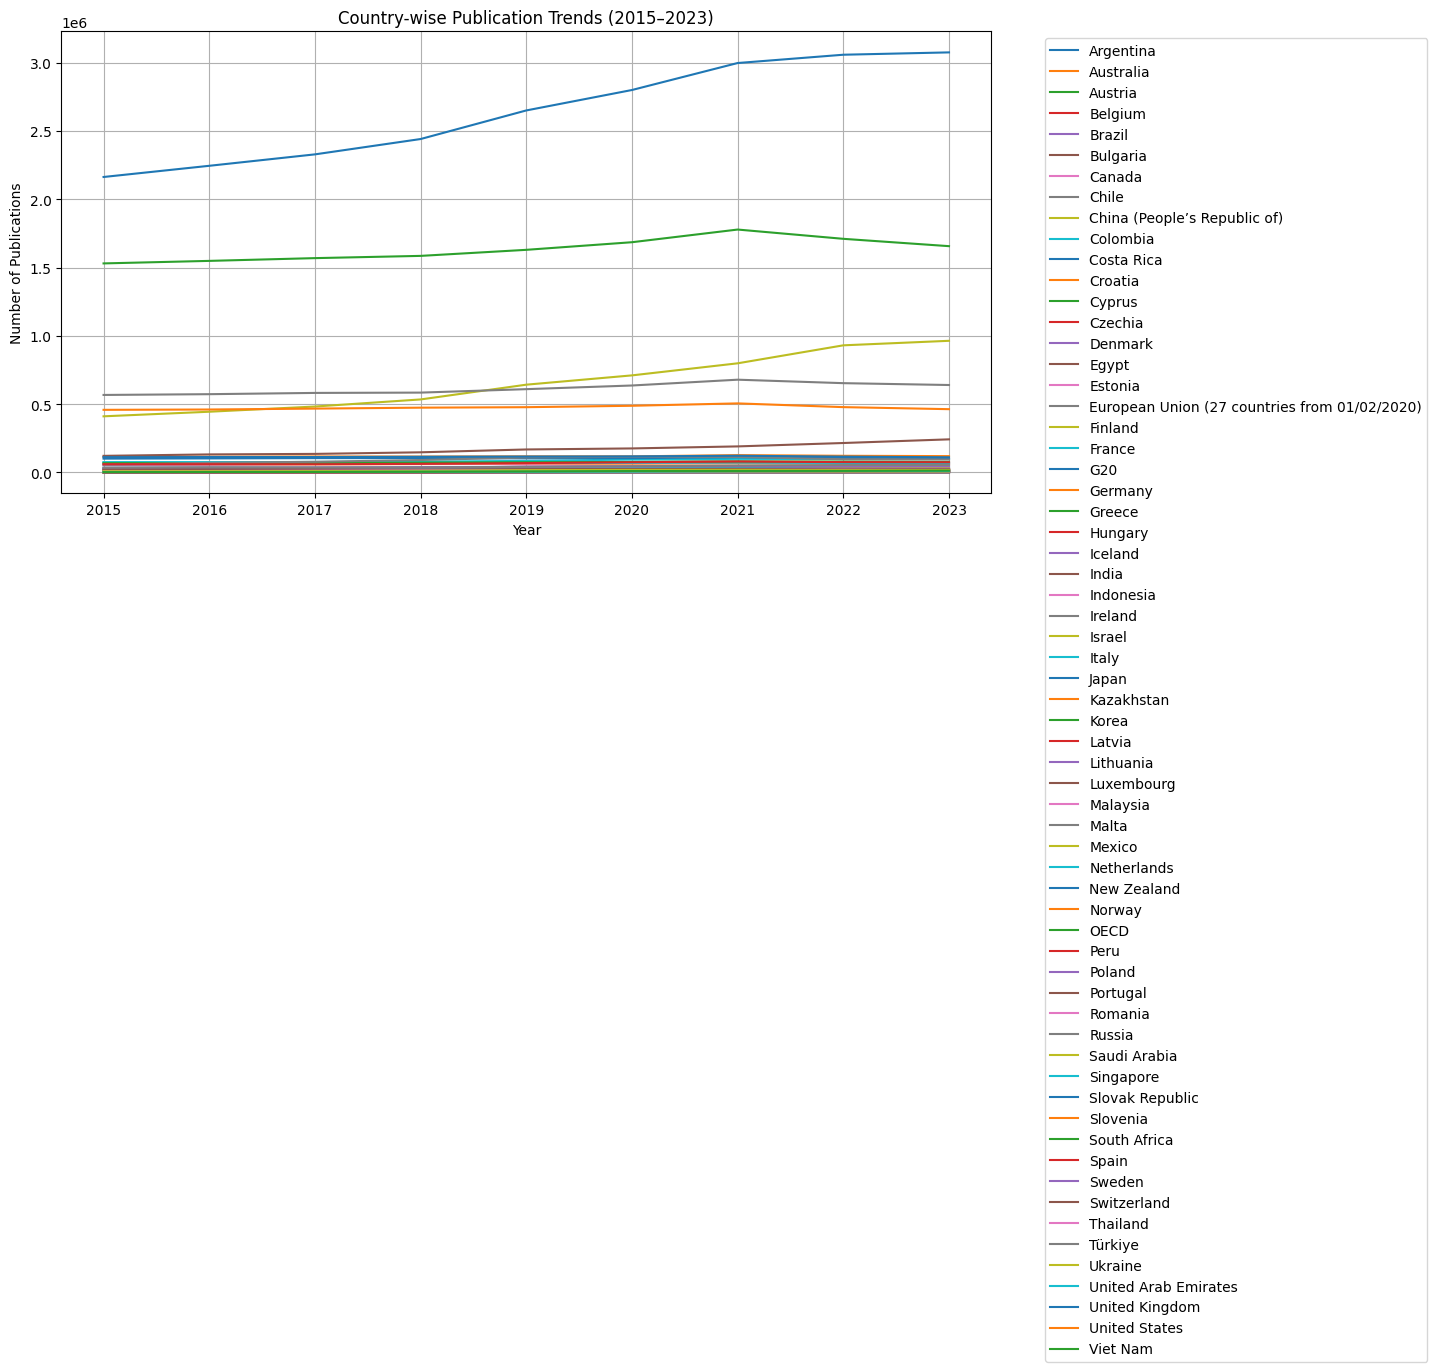

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
for country in country_trends["Reference area"].unique():
    data = country_trends[country_trends["Reference area"] == country]
    plt.plot(data["TIME_PERIOD"], data["OBS_VALUE"], label=country)

plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.title("Country-wise Publication Trends (2015–2023)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.show()

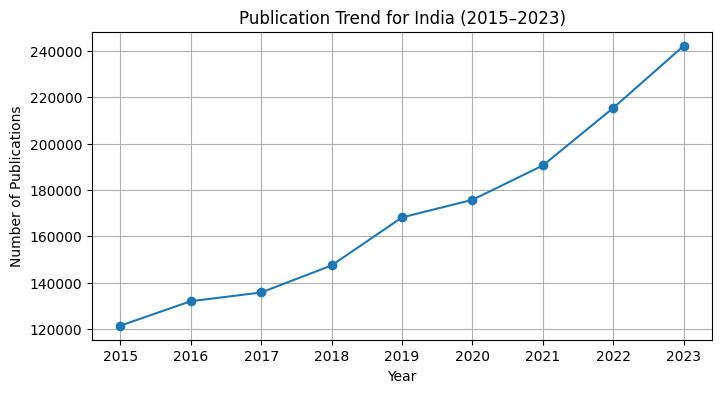

In [11]:
country_name = "India"

country_data = country_trends[country_trends["Reference area"] == country_name]

plt.figure(figsize=(8,4))
plt.plot(country_data["TIME_PERIOD"], country_data["OBS_VALUE"], marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.title(f"Publication Trend for {country_name} (2015–2023)")
plt.grid(True)
plt.show()

In [12]:
sdg_counts = df.groupby("SDG_GOAL")["OBS_VALUE"].sum().reset_index()
sdg_counts

,SDG_GOAL,OBS_VALUE
0,G_0,4.322461e+06
1,G_1,8.597587e+05
2,G_10,1.283206e+06
3,G_11,2.123207e+06
4,G_12,2.907899e+06
5,G_13,3.306454e+06
6,G_14,1.380233e+06
7,G_15,2.287844e+06
8,G_16,1.191443e+06
9,G_17,1.313568e+06


In [13]:
aligned = df[df["SDG_GOAL"] != "None"]["OBS_VALUE"].sum()
not_aligned = df[df["SDG_GOAL"] == "None"]["OBS_VALUE"].sum()

aligned, not_aligned

(69429871.52303874, 0.0)

In [14]:
sdg_country = df.groupby(["Reference area", "SDG_GOAL"])["OBS_VALUE"].sum().reset_index()
heatmap_data = sdg_country.pivot(index="Reference area", columns="SDG_GOAL", values="OBS_VALUE").fillna(0)
heatmap_data.head()

SDG_GOAL,G_0,G_1,G_10,G_11,G_12,G_13,G_14,G_15,G_16,G_17,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9
Reference area,,,,,,,,,,,,,,,,,,
Argentina,5711.795179,1434.791244,2150.907654,3377.714815,5137.629885,4977.889960,3176.464512,7621.903035,2357.089691,2037.406031,4146.252493,25672.888468,8018.844992,2385.730173,2246.897884,3808.845005,2382.911772,6902.095943
Australia,32580.293267,9063.079721,11956.605300,20247.002572,22519.899815,25186.146401,14986.068924,23496.099944,11352.702744,10500.903665,16496.393976,191570.319160,49174.685330,12499.672728,10530.780774,26213.981477,13374.300614,56091.670134
Austria,10459.197608,1821.136456,2649.140957,4630.435832,5520.367420,6829.547212,2464.886367,4871.076983,2576.388479,2824.462846,3189.551763,40318.565499,10840.646092,2811.119955,2294.271945,7053.210834,2763.058876,20502.585179
Belgium,11113.518174,2338.094352,3275.073534,5204.824657,6602.547684,7259.252908,3221.869328,5942.419121,3336.785329,3208.503840,4669.388538,57809.383256,13070.752590,3487.919350,2973.000128,8663.825824,3695.071150,22242.794546
Brazil,27467.484538,7714.758359,11780.206642,20293.010128,38166.277739,27605.522158,14800.634956,34748.793364,10975.522730,12357.597152,24849.641225,199717.180570,46962.049821,11841.893357,15801.087513,28583.551193,11782.758694,61868.093010


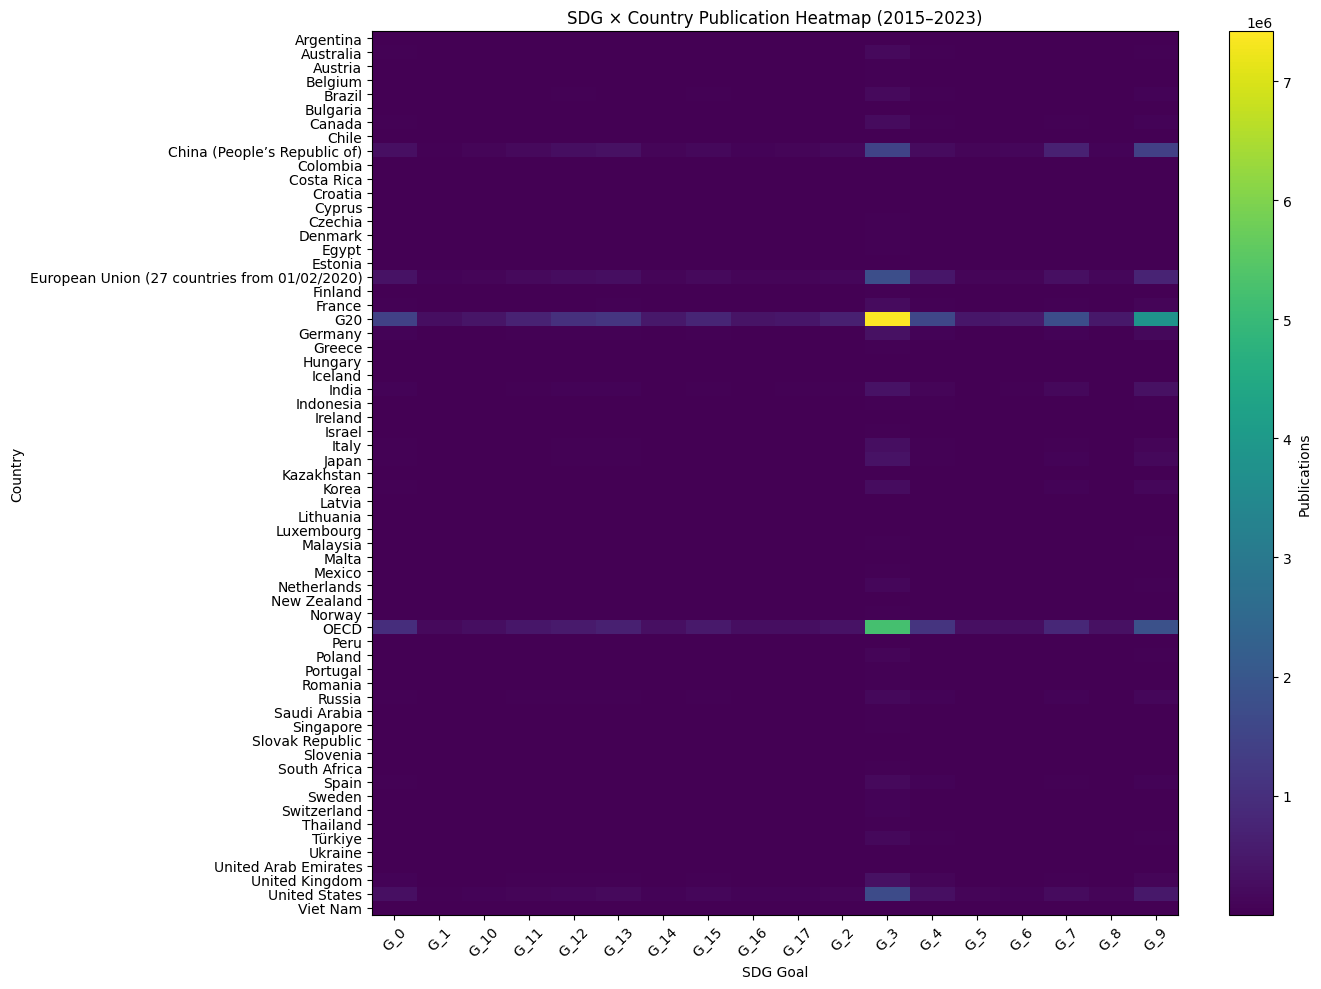

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,10))
data = heatmap_data.values
plt.imshow(data, aspect='auto')
plt.colorbar(label="Publications")
plt.xticks(ticks=np.arange(len(heatmap_data.columns)), labels=heatmap_data.columns, rotation=45)
plt.yticks(ticks=np.arange(len(heatmap_data.index)), labels=heatmap_data.index)

plt.title("SDG × Country Publication Heatmap (2015–2023)")
plt.xlabel("SDG Goal")
plt.ylabel("Country")

plt.tight_layout()
plt.show()


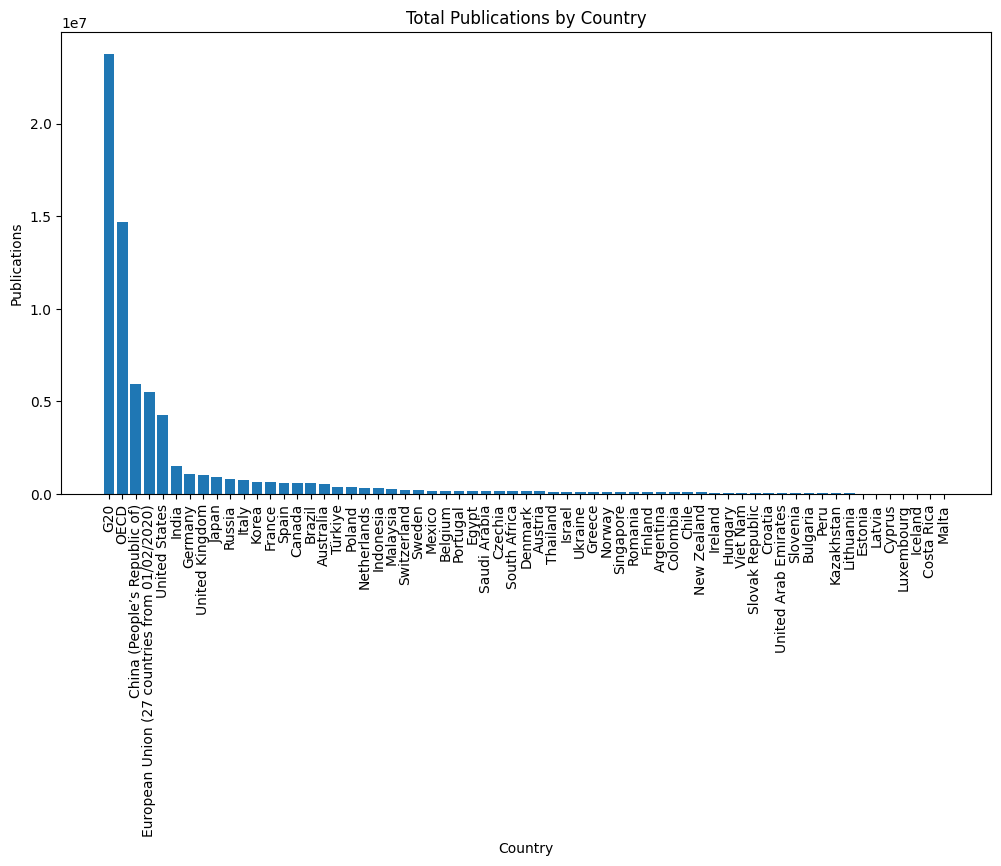

In [18]:
country_counts = df.groupby("Reference area")["OBS_VALUE"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Publications")
plt.title("Total Publications by Country")
plt.show()
